In [19]:
import query_helper
import pandas as pd 
import charlie_functions
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set_style('darkgrid')
sns.set(context='notebook',rc={'figure.figsize':(12,10)})

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [20]:
df = pd.read_csv('/Users/schlinkertc/Flatiron/projects/MLB_Stats/MLB_Data.csv',index_col=0)
df['game_date'] = df['game_date'].map(lambda x:pd.to_datetime(x))

In [21]:
NL = df[df['league']=='NL']
AL = df[df['league']=='AL']

NL_runs = NL['run_total']
AL_runs = AL['run_total']

By graphing the theoretical sampling distribution of means, we can visualize the Central Limit Theorum at play. This ultimately allows to perform our statistical analysis. 

Text(0.5, 0, 'Mean Runs Scored per Game')

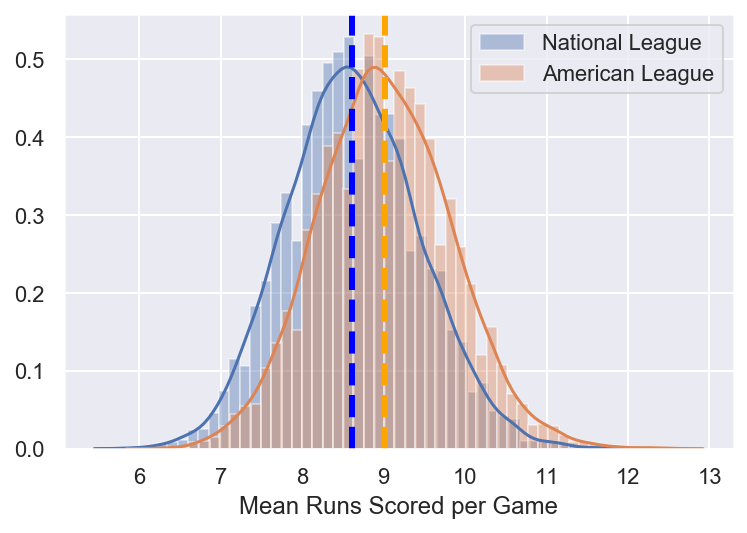

In [22]:
NL_samples = [np.random.choice(NL_runs, replace=False, size=30) for i in range(len(NL_runs/30))]
AL_samples = [np.random.choice(AL_runs, replace=False, size=30) for i in range(len(AL_runs/30))]

NL_sampleMeans = [np.mean(i) for i in NL_samples]
AL_sampleMeans = [np.mean(i) for i in AL_samples]

sns.distplot(NL_sampleMeans,label='National League')
sns.distplot(AL_sampleMeans,label='American League')

plt.axvline(NL_runs.mean(),color='blue', linestyle='--', lw=3)
plt.axvline(AL_runs.mean(),color='orange', linestyle='--', lw=3)

plt.legend()
plt.xlabel('Mean Runs Scored per Game')

### Our next hypothesis test will determine the effect of weather on runs scored per game

We initially planned to consider 'weather category' as provided by the MLB. 


In [5]:
#take out snow because it was only two games.
snow = df[df['weather_category']=='snow'].index
df.drop(snow,inplace=True)
snow

Int64Index([9734, 21649], dtype='int64')

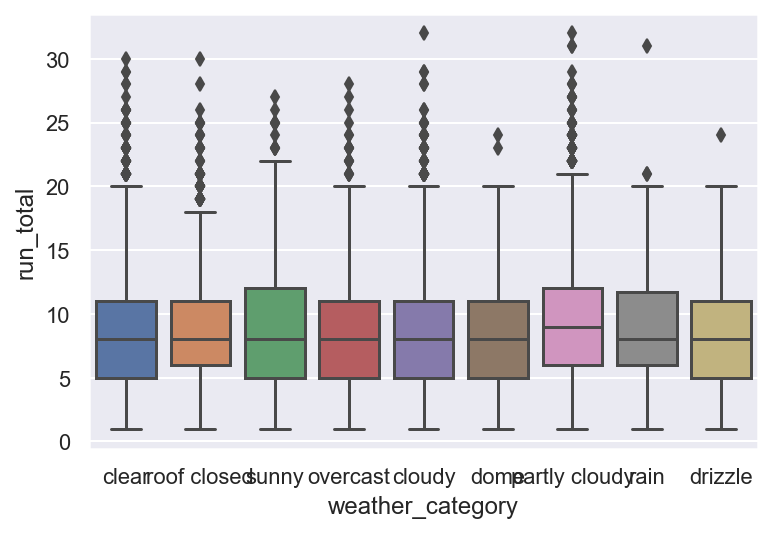

In [13]:
sns.boxplot(x=df['weather_category'],y=df['run_total'],orient='v')

In [17]:
conditions = list(df['weather_category'].unique())
games_per_condition = [(i,df[df['weather_category']==i].shape[0]) for i in conditions]
games_per_condition

[('clear', 5148),
 ('roof closed', 2711),
 ('sunny', 2580),
 ('overcast', 1573),
 ('cloudy', 4666),
 ('dome', 988),
 ('partly cloudy', 8324),
 ('rain', 142),
 ('drizzle', 187)]

#### We abandoned this analysis because weather would have a drastically different effect on games played during the day versus those played at night. 

We opted to examine the effect of temperature instead. This required correlation analysis. 